In [ ]:
#Medicine Repurposing

import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


def clean_csv(file_path, wanted_columns):
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Keep only the wanted columns
    df = df[wanted_columns]

    # Drop rows with any missing values
    df.dropna(inplace=True)

    return df


file_path = "/content/drugs_side_effects_drugs_com.csv"
wanted_columns = ['drug_name', 'medical_condition', 'side_effects', 'generic_name', 'brand_names']
cleaned_data = clean_csv(file_path, wanted_columns)

# Save the cleaned dataframe to a new CSV file
cleaned_data.to_csv("/content/cleaned_drugs_side_effects_drugs_com.csv", index=False)


# Convert the side effects text data into numerical data
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(cleaned_data['side_effects'])

# Use the medical_condition as the target variable
y = cleaned_data['medical_condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.6104651162790697
Classification Report:
                      precision    recall  f1-score   support

                ADHD       1.00      0.33      0.50         6
            AIDS/HIV       1.00      1.00      1.00        11
                Acne       0.51      0.75      0.61        28
           Allergies       0.00      0.00      0.00         2
         Alzheimer's       0.00      0.00      0.00         5
              Angina       1.00      0.33      0.50         6
             Anxiety       0.29      1.00      0.44         6
              Asthma       1.00      0.30      0.46        10
    Bipolar Disorder       0.70      0.88      0.78         8
          Bronchitis       1.00      0.33      0.50         9
                COPD       0.00      0.00      0.00         1
              Cancer       0.00      0.00      0.00         4
         Cholesterol       0.00      0.00      0.00         4
         Colds & Flu       0.68      0.85      0.76        40
        Constipat

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


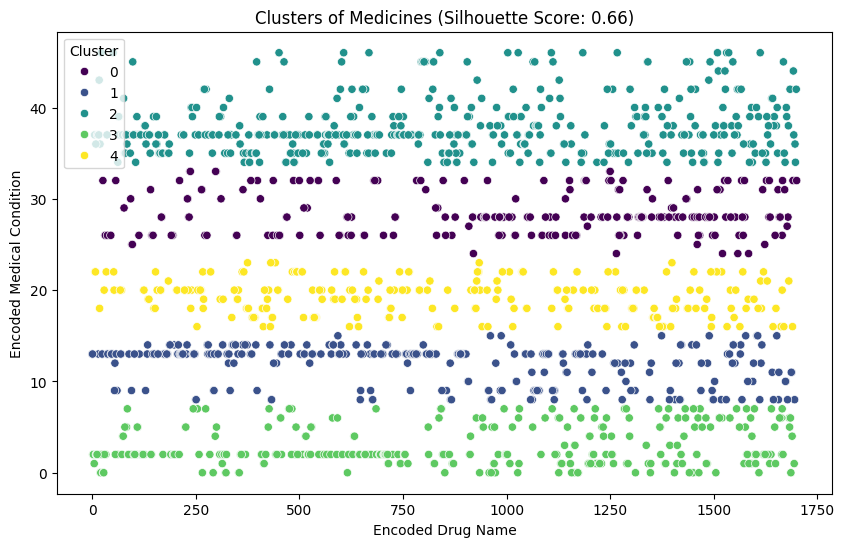

(        drug_name medical_condition  \
 0     doxycycline              Acne   
 1  spironolactone              Acne   
 2     minocycline              Acne   
 4     clindamycin              Acne   
 5       Aldactone              Acne   
 
                                         side_effects         generic_name  \
 0  (hives, difficult breathing, swelling in your ...          doxycycline   
 1  hives ; difficulty breathing; swelling of your...       spironolactone   
 2  skin rash, fever, swollen glands, flu-like sym...          minocycline   
 4  hives ; difficult breathing; swelling of your ...  clindamycin topical   
 5  hives ; difficulty breathing; swelling of your...       spironolactone   
 
                                          brand_names  drug_name_encoded  \
 0  Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...               1207   
 1                                Aldactone, CaroSpir               1619   
 2  Dynacin, Minocin, Minolira, Solodyn, Ximino, V...       

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


# Label categorical variables
label_encoder = LabelEncoder()
cleaned_df['drug_name_encoded'] = label_encoder.fit_transform(cleaned_df['drug_name'])
cleaned_df['medical_condition_encoded'] = label_encoder.fit_transform(cleaned_df['medical_condition'])

# Select features for clustering
features = ['medical_condition_encoded']
X = cleaned_df[features]


# k-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
cleaned_df['cluster'] = kmeans.fit_predict(X)

# Calculate silhouette score
score = silhouette_score(X, cleaned_df['cluster'])

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='drug_name_encoded', y='medical_condition_encoded', hue='cluster', data=cleaned_df, palette='viridis')
plt.title(f'Clusters of Medicines (Silhouette Score: {score:.2f})')
plt.xlabel('Encoded Drug Name')
plt.ylabel('Encoded Medical Condition')
plt.legend(title='Cluster')
plt.show()

# Display the first few rows of the dataframe and the silhouette score
cleaned_df.head(), score


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


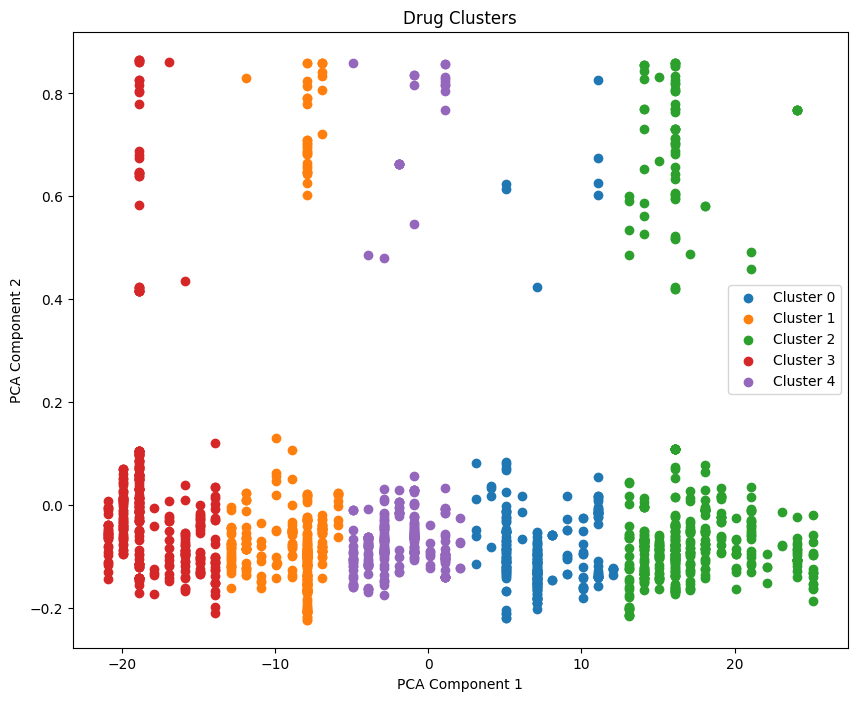

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the CSV file
file_path = '/content/cleaned_drugs_side_effects_drugs_com.csv'
data = pd.read_csv(file_path)

# Extract features
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
side_effects_features = vectorizer.fit_transform(data['side_effects'])

# Encode the medical conditions
label_encoder = LabelEncoder()
medical_condition_encoded = label_encoder.fit_transform(data['medical_condition'])

# Combine features into a single dataframe for clustering
features = np.hstack((side_effects_features.toarray(), medical_condition_encoded.reshape(-1, 1)))

# Clustering using K-means
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features)

# Add cluster labels to the original data
data['cluster'] = kmeans.labels_

# Reduction using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

# Plot the clusters
plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    plt.scatter(pca_features[data['cluster'] == cluster, 0], pca_features[data['cluster'] == cluster, 1], label=f'Cluster {cluster}')
plt.title('Drug Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

#Clusters saved to cvs file
output_path = '/content/clustered_drugs_side_effects_drugs_com.csv'
data.to_csv(output_path, index=False)
